In [1]:
import chess
import chess.engine
import os
import sys
import chess.pgn
import subprocess

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

import utils.chess_utils as chess_utils
from utils.pikeBot_chess_utils import *
from utils.utils import *
config=get_paths()
stockfish_path=config['stockfish_path']
maia_path=config['maia_path']
from evaluation_utils import *

In [2]:
def get_maia_path(maia_elo):
    version=int(str(maia_elo)[1])
    if version not in [1,5,9]:
        raise ValueError("Maia elo must be from (1100, 1500, 1900)")
    else:
        return maia_path.format(version=version)


In [3]:
class MaiaChess(chess_utils.Player):
    def __init__(self, maia_path: str) -> None:
        super().__init__()
        #redirect error stderr not to display messages from the engine
        self.engine = chess.engine.SimpleEngine.popen_uci(maia_path, stderr=subprocess.DEVNULL)

    def get_best_move(self, board):
        result = self.engine.play(board, chess.engine.Limit(nodes=1))
        move = result.move
        return move

### Parameters setup
set path parameters to your local resources and evaluation parameters depending on your evaluation setup

In [4]:
model_path = config['pikebotSmall500k_path']
preprocessing_parameters_path = config['preprocessing_params_path']

#evaluation parameters
time_limit = 0.01
evaluation_dataset_paths = [
    # 'games/bias-openings_-2.pgn',
    # 'games/bias-openings_-3.pgn',
    # 'games/bias-openings_-4.pgn',
    # 'games/bias-openings_2.pgn',
    # 'games/bias-openings_3.pgn',
    # 'games/bias-openings_4.pgn',
    'games/silversuite.pgn',
    ]

### Engine definition
By default engine1 is a maia chess engine simulating human behavior but you can modify it if you want other engine comparison. Both engines must be of a child class of chess_utils.Player.

In [5]:
maia_elo = 1100
maia_path = get_maia_path(maia_elo)
engine1 = MaiaChess(maia_path)

In [7]:
from Pikebot.PikeBotHeuristic8 import PikeBotHeuristic8
from Pikebot.PikeBotHeuristic5 import PikeBotHeuristic5
from utils.pikeBot_chess_utils import PikeBotModelWrapper, Pikebot
model = PikeBotModelWrapper(model_path, preprocessing_parameters_path)
engine2 = Pikebot(
    model,
    chess_utils.max_aggr,
    stockfish_path
)
engine3 = PikeBotHeuristic8(
    model,
    chess_utils.max_aggr,
    stockfish_path
)
engine4 = PikeBotHeuristic5(
    model,
    chess_utils.max_aggr,
    stockfish_path
)

### Dataset loading

In [12]:
boards_datasets = dict()
for path in evaluation_dataset_paths:
    boards_dataset = get_boards_dataset(path)

    boards_datasets[path] = boards_dataset


In [10]:
# boards_datasets['games/silversuite.pgn'] = boards_datasets['games/silversuite.pgn'][:1]

### Evaluation code

100%|██████████| 50/50 [1:07:25<00:00, 80.91s/it] 


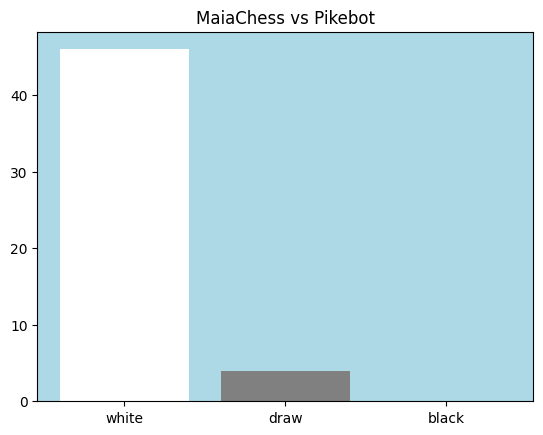

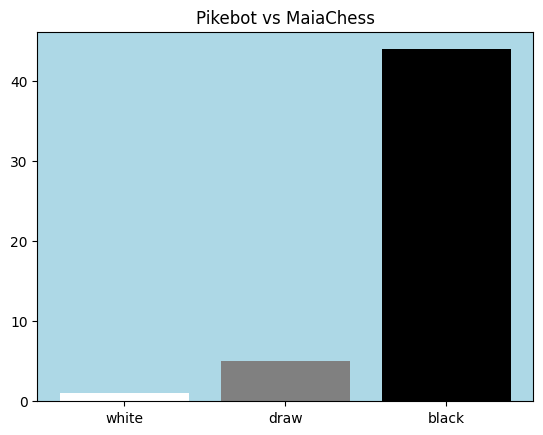

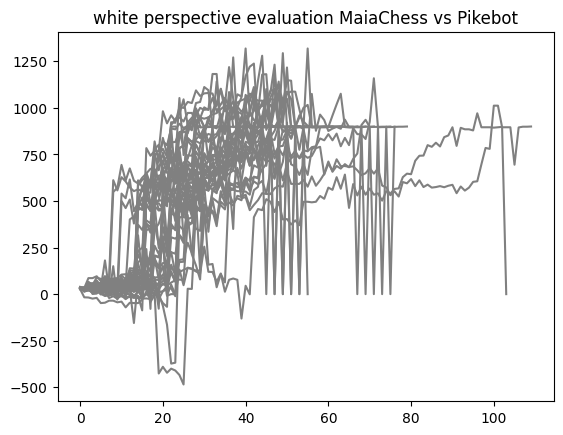

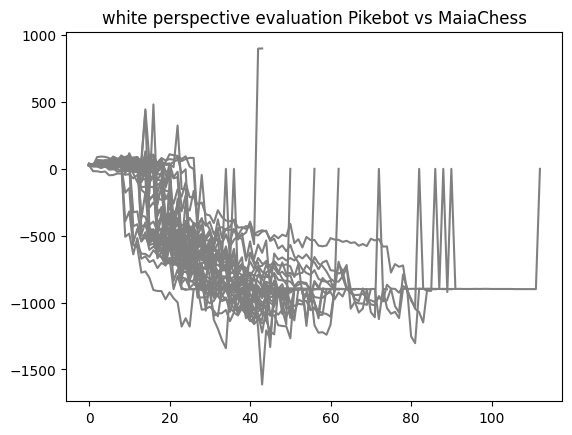

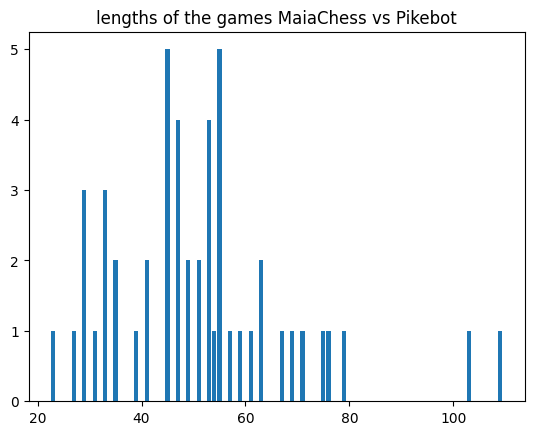

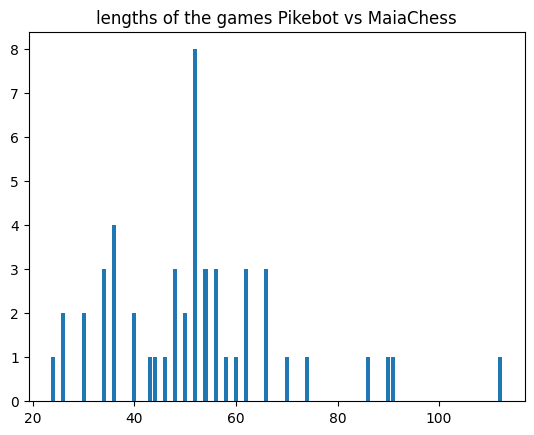

100%|██████████| 50/50 [11:25<00:00, 13.71s/it]


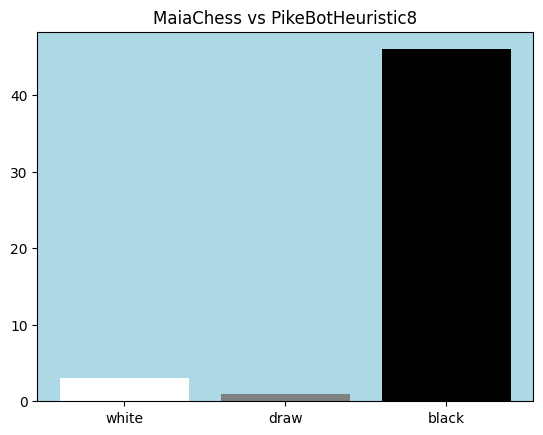

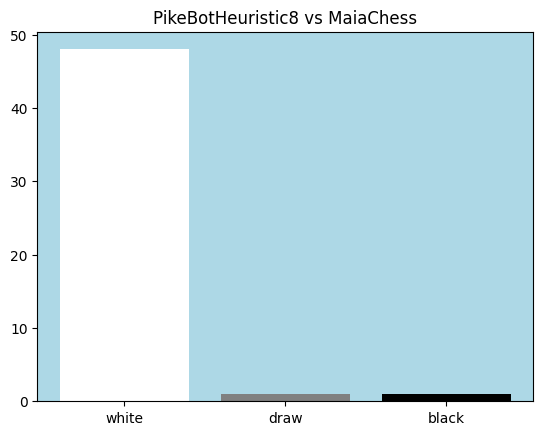

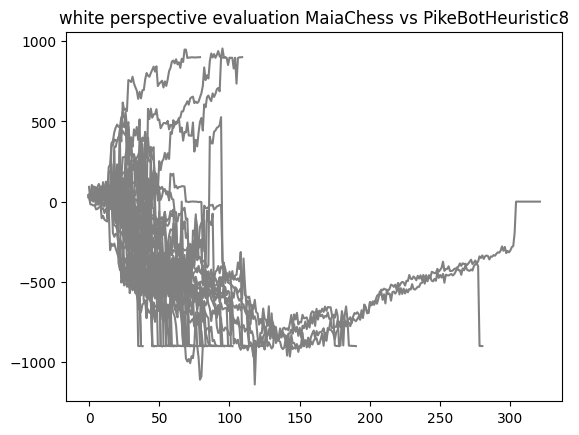

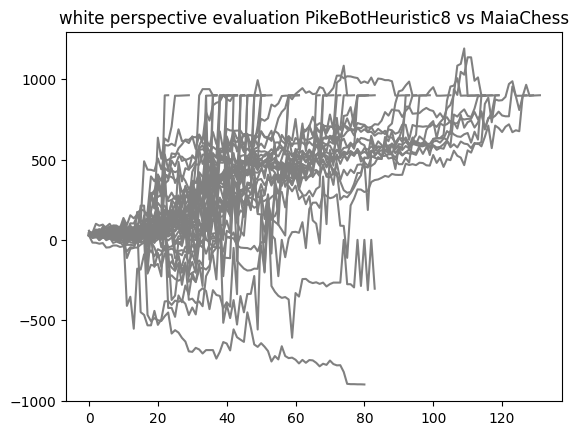

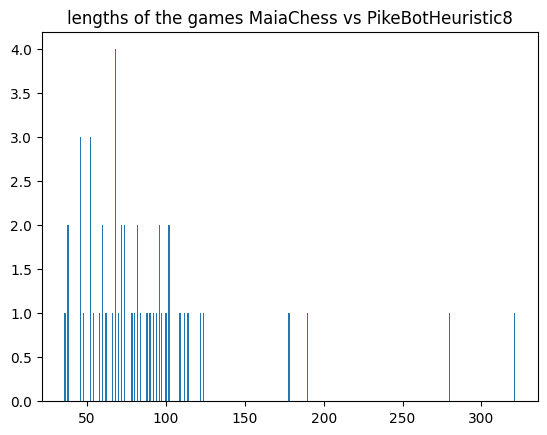

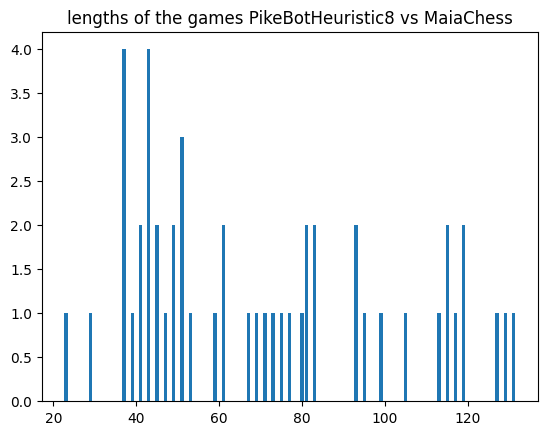

100%|██████████| 50/50 [27:54<00:00, 33.49s/it]


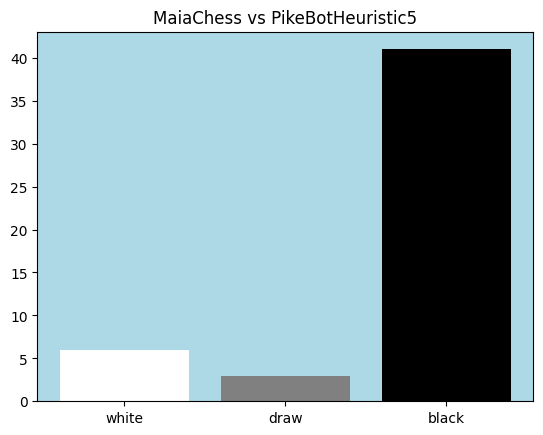

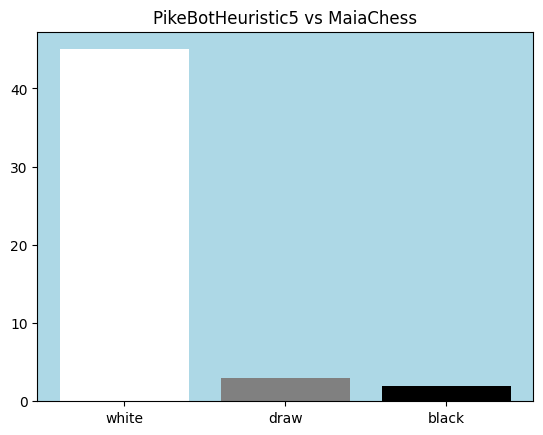

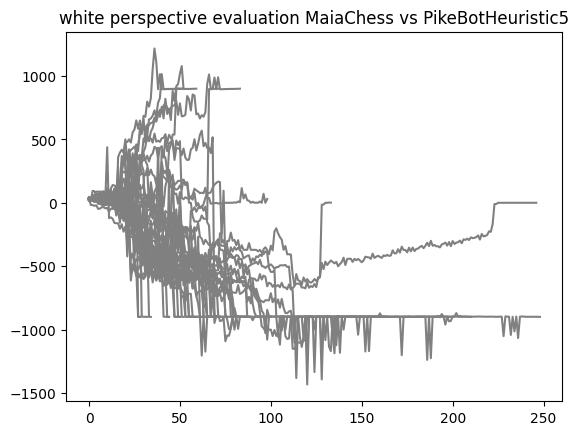

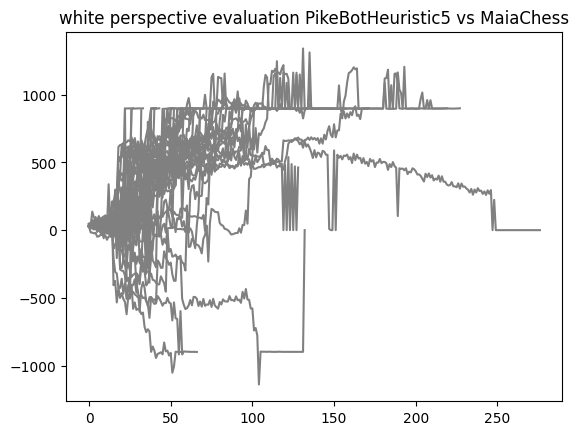

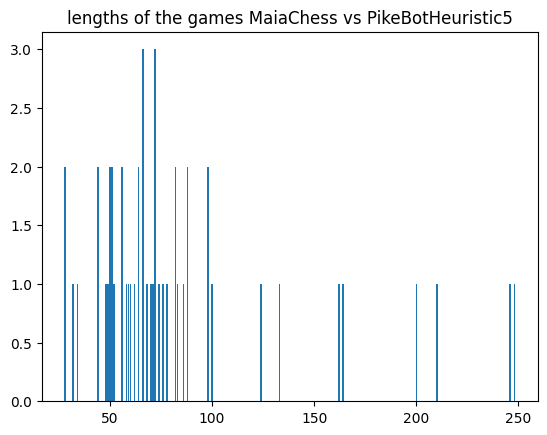

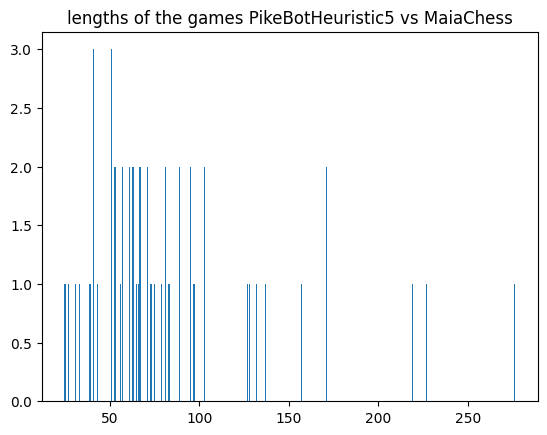

In [13]:
evaluate_engines(engine1, engine2, boards_datasets, maia_elo, 800)
evaluate_engines(engine1, engine3, boards_datasets, maia_elo, 800)
evaluate_engines(engine1, engine4, boards_datasets, maia_elo, 800)